## Polynomial Regression

#### Polynomial regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables.

In Linear Regression, with a single predictor, we have the following equation:

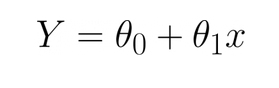
where,

          Y is the target,
          x is the predictor,
          𝜃0 is the bias,
          and 𝜃1 is the weight in the regression equation

This linear equation can be used to represent a linear relationship. But, in polynomial regression, we have a polynomial equation of degree n represented as:
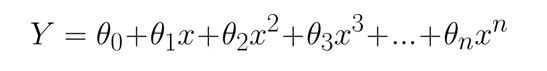

 𝜃0 is the bias,

          𝜃1, 𝜃2, …, 𝜃n are the weights in the equation of the polynomial regression,
          and n is the degree of the polynomial

The number of higher-order terms increases with the increasing value of n, and hence the equation becomes more complicated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
df=pd.read_csv("../Data/position_salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = df[["Level"]]
y = df["Salary"]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Text(0, 0.5, 'Salary')

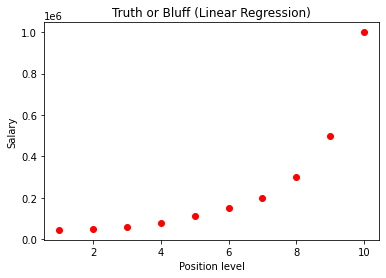

In [5]:
plt.scatter(X, y, color='red')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Text(0, 0.5, 'Salary')

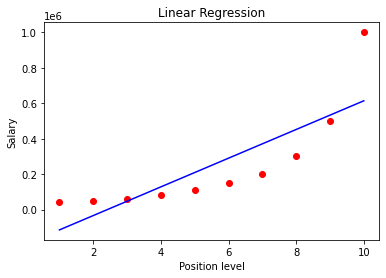

In [7]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

#### The implementation of polynomial regression is a two-step process. First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and then use linear regression to fit the parameters:
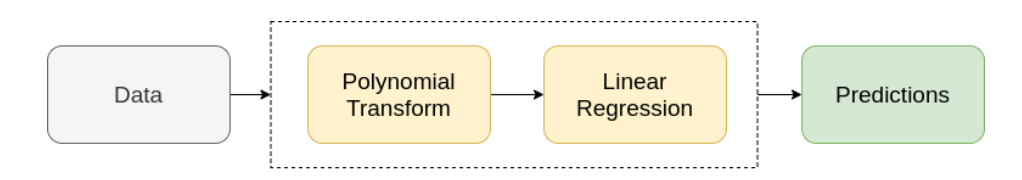

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

 I have taken a 4-degree polynomial. We can choose the degree of polynomial based on the relationship between target and predictor. The 1-degree polynomial is a simple linear regression; therefore, the value of degree must be greater than 1.

With the increasing degree of the polynomial, the complexity of the model also increases. Therefore, the value of n must be chosen precisely. If this value is low, then the model won’t be able to fit the data properly and if high, the model will overfit the data easily.

Text(0, 0.5, 'Salary')

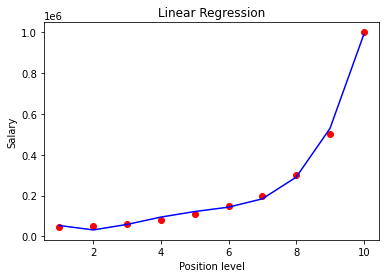

In [9]:
# Visualizing the Polymonial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

In [10]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

array([249500.])

In [11]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003


array([132148.43750003])

In [12]:
lin_reg.score(X,y)

0.6690412331929895

In [13]:
pol_reg.score(X_poly,y)

0.9973922891706614

In [14]:
df=pd.read_csv("../Data/mtcars.csv")

In [15]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
x=df.drop(columns=["model","mpg"])

In [17]:
y=df["mpg"]

In [25]:
poly_reg = PolynomialFeatures(degree=3)

In [26]:
x_poly=poly_reg.fit_transform(x)

In [27]:
x_poly

array([[  1.,   6., 160., ...,  64.,  64.,  64.],
       [  1.,   6., 160., ...,  64.,  64.,  64.],
       [  1.,   4., 108., ...,  16.,   4.,   1.],
       ...,
       [  1.,   6., 145., ..., 150., 180., 216.],
       [  1.,   8., 301., ..., 200., 320., 512.],
       [  1.,   4., 121., ...,  32.,  16.,   8.]])

In [20]:
lin_reg.fit(x,y)

LinearRegression()

In [21]:
lin_reg.score(x,y)

0.8690157644777647

In [28]:
pol_reg.fit(x_poly,y)

LinearRegression()

In [29]:
pol_reg.score(x_poly,y)

1.0

In [34]:
from sklearn.pipeline import Pipeline

pipeline_lr=Pipeline([('transform',PolynomialFeatures(degree=1)),('model',LinearRegression())])
model = pipeline_lr.fit(x, y)
model.score(x,y)

1.0

In [52]:
df=pd.read_csv("../Data/position_salaries.csv")
x = df[["Level"]]
y = df["Salary"]

In [53]:
poly_reg = PolynomialFeatures(degree=1)
x_poly=poly_reg.fit_transform(x)
pol_reg.fit(x_poly,y)
ypred1=pol_reg.predict(x_poly)

In [54]:
poly_reg = PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
pol_reg.fit(x_poly,y)
ypred2=pol_reg.predict(x_poly)

In [55]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
pol_reg.fit(x_poly,y)
ypred3=pol_reg.predict(x_poly)

In [56]:
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
pol_reg.fit(x_poly,y)
ypred4=pol_reg.predict(x_poly)

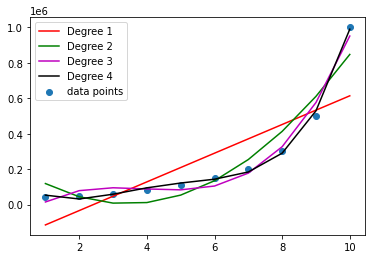

In [62]:
plt.scatter(x,y,label="data points")
plt.plot(x,ypred1, color='r',label="Degree 1")
plt.plot(x,ypred2, color='g',label="Degree 2")
plt.plot(x,ypred3, color='m',label="Degree 3")
plt.plot(x,ypred4, color='k',label="Degree 4")
plt.legend()